<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/CSE_3210_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***LAB-5***
### Topic: Fourier Transform
Date: 26.05.25

## **Constructing a Wave with Different Sine Waves**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

## **Difference between sine wave and cosine wave**

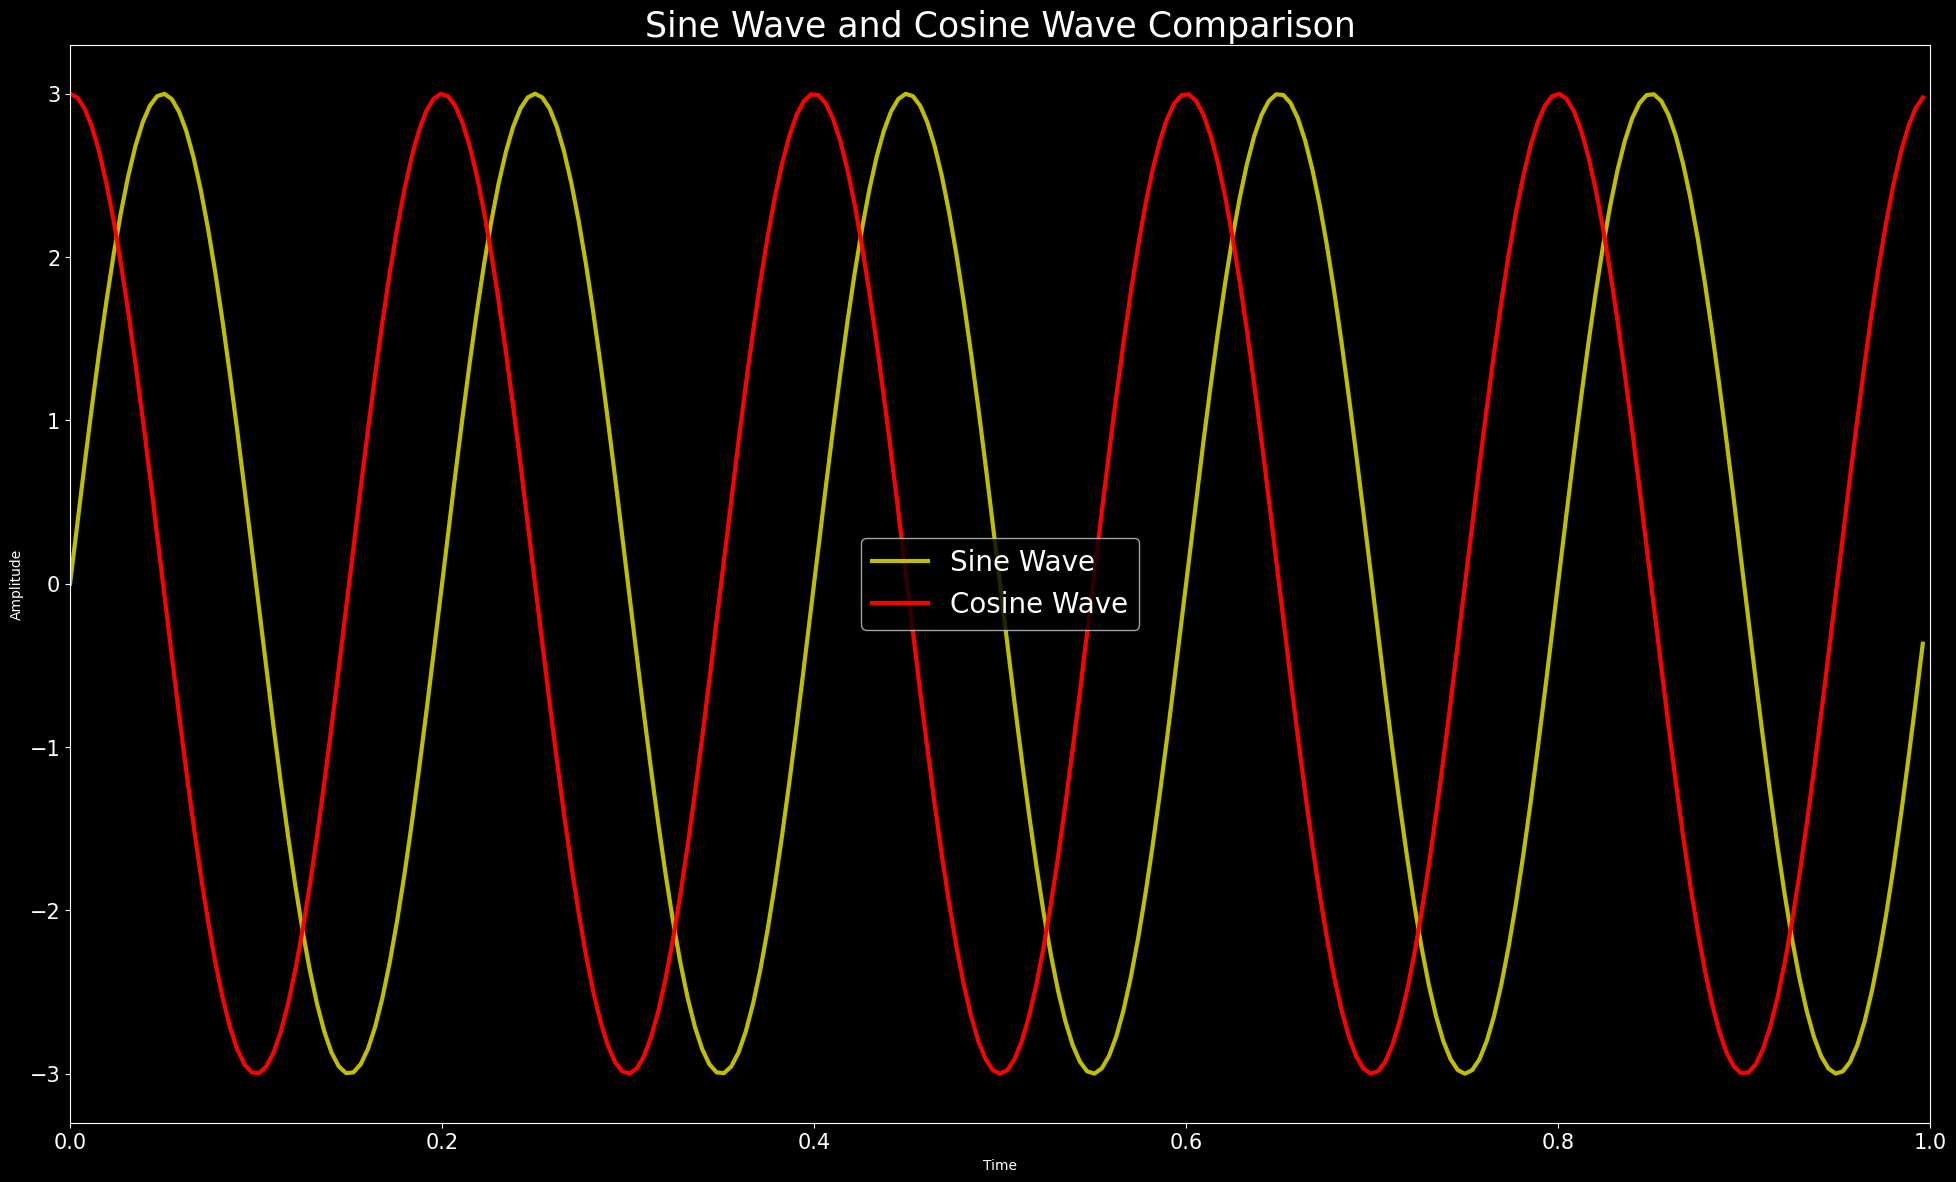

In [ ]:
srate = 256  # Hz
t = np.arange(0., 1., 1/srate)   # time vector in seconds

SineWave = 3 * np.sin(2*np.pi * 5 * t)
CosineWave = 3 * np.cos(2*np.pi * 5 * t)
plt.figure(figsize = (24, 14))
style.use('dark_background')

plt.plot(t, SineWave, 'y', linewidth = 3, label = 'Sine Wave')
plt.plot(t, CosineWave, 'r', linewidth = 3, label = 'Cosine Wave')
plt.xlabel('Time'), plt.ylabel('Amplitude')
plt.title('Sine Wave and Cosine Wave Comparison', fontsize = 25)

plt.legend(fontsize = 20)
plt.xlim([0, 1])
plt.show()

### Constructing  a waveform with sine, cosine and a DC

In [ ]:
srate = 256
t = np.arange(0., 1., 1/srate)

x1 = np.sin(2 * np.pi * 2 * t)   # sinewave
x2 = 2 * np.cos(2 * np.pi * 4* t) # cosinewave

x3 = x1 + x2

DC = 2

x4 = DC + x1 + x2

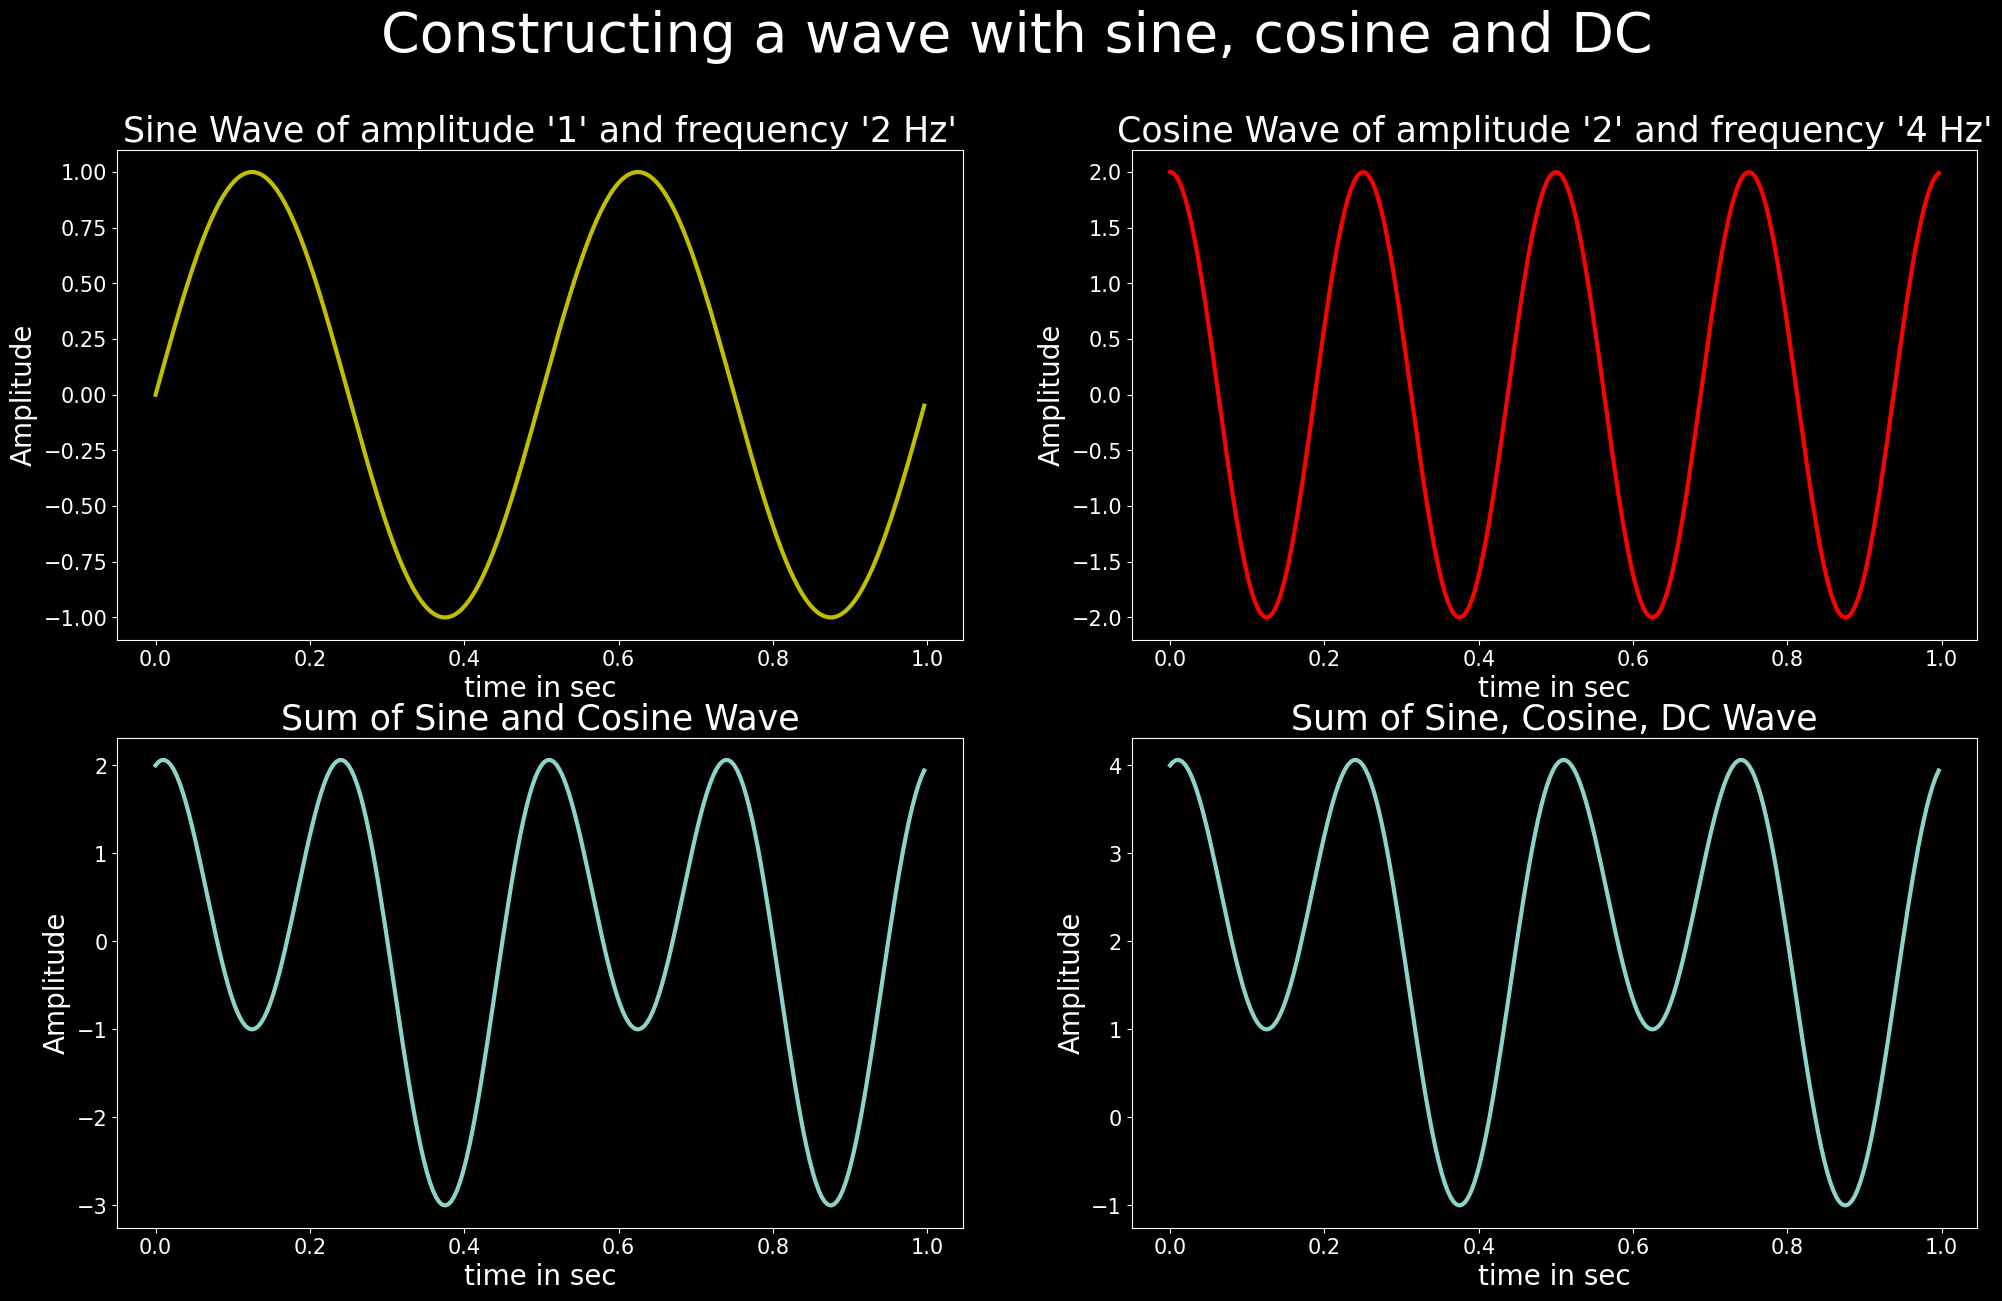

In [ ]:
# Plotting

plt.figure(figsize = (24, 14)) # set the size of figure
plt.suptitle('Constructing a wave with sine, cosine and DC', fontsize = 40)
style.use('dark_background')

plt.subplot(2, 2, 1)
plt.plot(t, x1, 'y', linewidth = 3)
plt.title("Sine Wave of amplitude '1' and frequency '2 Hz'", fontsize = 25)
plt.xlabel("time in sec", fontsize = 20), plt.ylabel("Amplitude", fontsize = 20)

plt.subplot(2, 2, 2)
plt.plot(t, x2, 'r', linewidth = 3)
plt.title("Cosine Wave of amplitude '2' and frequency '4 Hz'", fontsize = 25)
plt.xlabel("time in sec", fontsize = 20), plt.ylabel("Amplitude", fontsize = 20)

plt.subplot(2, 2, 3)
plt.plot(t, x3, linewidth = 3)
plt.title("Sum of Sine and Cosine Wave", fontsize = 25)
plt.xlabel("time in sec", fontsize = 20), plt.ylabel("Amplitude", fontsize = 20)

plt.subplot(2, 2, 4)
plt.plot(t, x4, linewidth = 3)
plt.title("Sum of Sine, Cosine, DC Wave", fontsize = 25)
plt.xlabel("time in sec", fontsize = 20), plt.ylabel("Amplitude", fontsize = 20)

plt.show()

### Fourier Transform

In [ ]:
srate = 256
Nyquist = srate / 2
t = np.arange(0., 1., 1/srate)

x1 = 5 * np.sin(2 * np.pi * 2 * t)   # First sinewave
x2 = 2 * np.sin(2 * np.pi * 4 * t)   # Second sinewave
x3 = 7 * np.sin(2 * np.pi * 6 * t)   # Third sinewave
x = x1 + x2 + x3                     # Combined sinewave

# initializing fourier coefficients
X = np.zeros(len(t), dtype = complex)  # Ck = X

for freq in range(0, len(t)):
  # create complex sine wave and compute dot product with signal
  csw = np.exp(-1j * np.pi * freq * t)
  X[freq] = np.sum(np.multiply(x, csw))   # Ck

  # extract amplitudes
  amps = 2 * np.abs(X) / len(t)
  # in the above line of code we multiply by 2 to incorporate the negative frequencies of cc

  #  converting indices to frequency
  Nyquist = srate / 2
  Hz = np.linspace(0, Nyquist, math.floor(len(t) / 2) + 1)


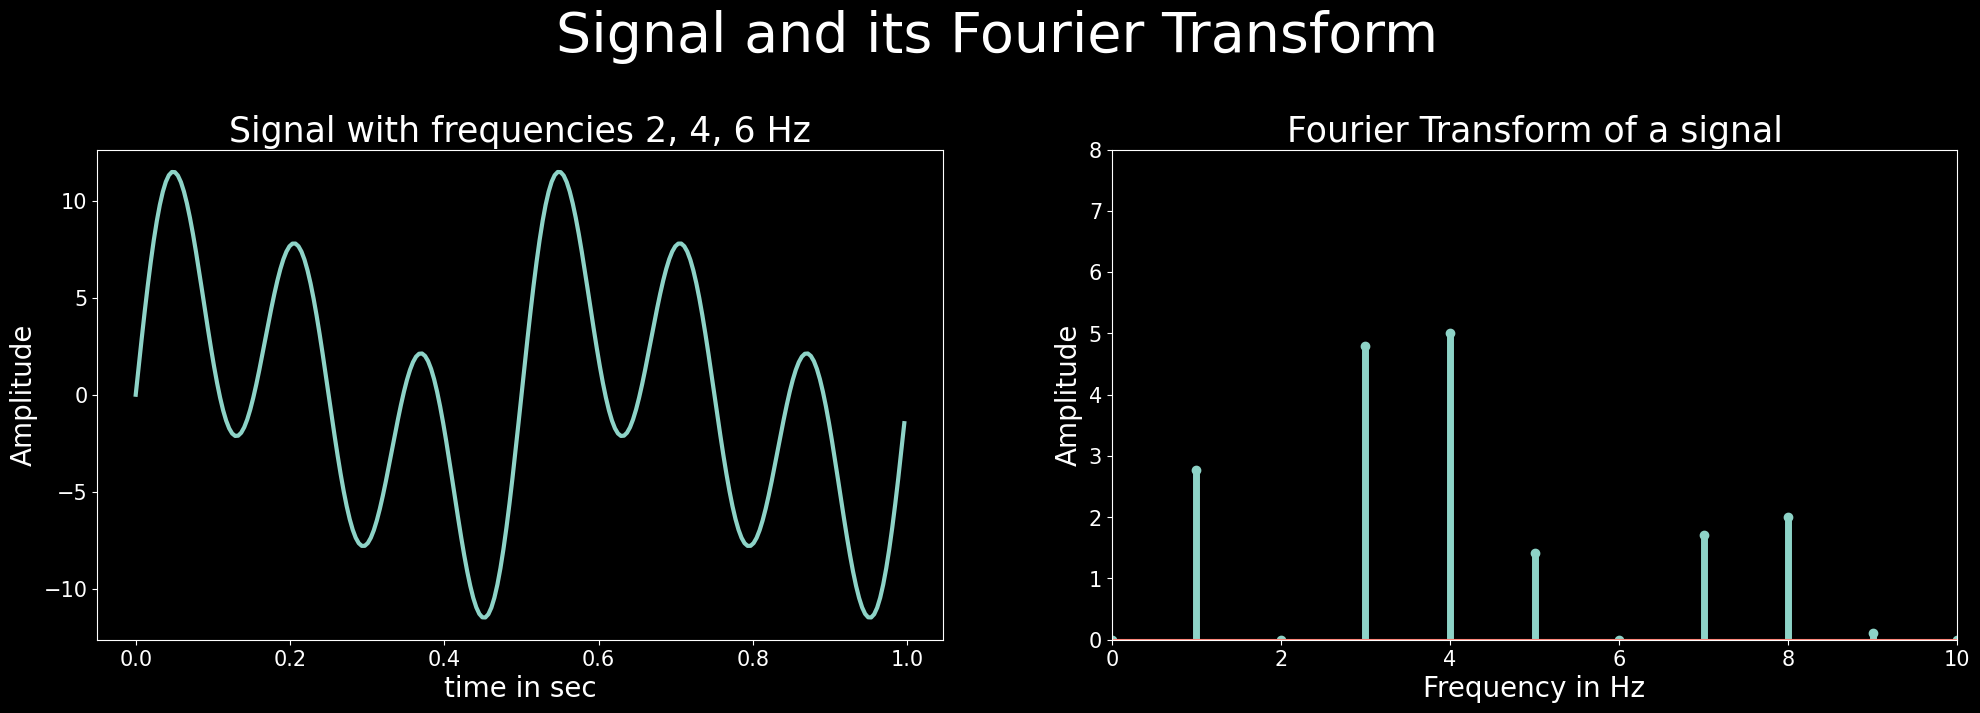

In [ ]:
# Plotting

plt.figure(figsize = (24, 14)) # set the size of figure
plt.suptitle('Signal and its Fourier Transform', fontsize = 40)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(2, 2, 1)
plt.plot(t, x, linewidth = 3)
plt.title("Signal with frequencies 2, 4, 6 Hz", fontsize = 25)
plt.xlabel("time in sec", fontsize = 20), plt.ylabel("Amplitude", fontsize = 20)
plt.subplot(2, 2, 2)
markerline, stemlines, baseline = plt.stem(Hz, amps[range(0, len(Hz))])
plt.setp(stemlines, 'linewidth', 5)

plt.xlim(0, 10)
plt.ylim(0, 8)
plt.title("Fourier Transform of a signal", fontsize = 25)
plt.xlabel("Frequency in Hz", fontsize = 20), plt.ylabel("Amplitude", fontsize = 20)

plt.show()